# Capstone Project
### Applied Data Science Capstone by IBM/Coursera - Final Module

**IMPLEMENTING ELECTRIC SCOOTER SHARING SYSTEM BUSINESS IN MANHATTAN**

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">INTRODUCTION</a>

2. <a href="#item2">DATA PREPARATION</a>

3. <a href="#item3">METHODOLOGY</a>

4. <a href="#item4">THE CODE</a>

5. <a href="#item5">RESULTS</a>   
    
5. <a href="#item5">DISCUSSION</a>  
</font>
</div>

## 1. INTRODUCTION

**Background and Business Problem description**

Citi Bike is a privately owned public bicycle sharing system serving the New York City boroughs of the Bronx, Brooklyn, Manhattan, and Queens, as well as Jersey City, New Jersey. It officially opened in June 2013 with 332 stations and 6,000 bikes. Annual expansions have brought the totals to 706 stations and 12,000 bikes as of October 2017, making the service the largest bike sharing program in the United States. Further expansions for Citi Bike are planned to extend its service area across the Bronx, Brooklyn, Manhattan, and Queens, and increase the number of bikes to 40,000. As of July 2017, there are 130,000 annual subscribers. Citi Bike riders took an average of 48,315 rides per day in 2018, and the system reached a total of 50 million rides in October 2017.

Bicycle Access to Office Buildings Law ("BAOB law") aims to increase bicycle commuting by providing cyclists with the opportunity to securely park their bicycles in or close to their workplaces. The law allows tenants to request for access from landlords in commercial buildings, and for DOT to monitor the requests for access and their status. The law was enacted in 2013.

Amid Covid-19 emergency, and the subsequent foreseeable increase of sharing transportation system use by New Yorkers as well as the foreseeable reduction of the use of the subway system, New York City Department of Transportation is intending to issue a public bid for the provision of 200 electric scooters and the installation of 2 pick-up stations in Manhattan. The project, after its initial "Beta" phase, will follow the provision of other 2,000 scooters and the installations of new stations. 

Scooz, Inc., a Colorado manufacturer of electric scooters, is intending to participate to the bid. The executive team, together with the commercial team, engaged us to provide a data report illustrating the best 5 Manhattan neighborhood areas where to install the 2 pick-up stations required by the bid. 

The CEO of the company has already released the following statement revealing the intention of the company to participate in the bid: "Cities around the world are embracing e-scooters as an environmentally-friendly, inexpensive way to get around, especially in transit deserts. New Yorkers are ready. We are encouraged with the overwhelming support we received from the legislature and from the environmental community. We look forward to bringing micro-mobility choices to New Yorkers next year."

The company has specifically pointed out that the pick-up stations are to be selected upon the following criteria: 

(1) neighborhoods where most used City Bike stations in Manhattan in the month of June 2013 (when the City Bike project was launched) are located; 

(2) commercial buildings that received major number of requests from tenant for bike inside parking; and 

(3) the presence of restaurant, gym and coffee shop as most common venues in neighborhoods identified under (1) and (2). With regard to the latter point, the company wants to provide, on one side, New Yorkers with the opportunity to reach and/or move around these places through the electric scooters, and the other side, find partnership and advertising opportunities through such existing businesses in the areas.


## 2. DATA PREPARATION [DATA SECTION]

1.	Dataset 1: This New York City Neighborhood Names point File publicly available at https://geo.nyu.edu/catalog/nyu_2451_34572

2.	Dataset 2: City Bike Trip Data History related to the month of June 2013 publicly available at https://s3.amazonaws.com/tripdata/index.html

3.	Dataset 3: Bikes in Buildings Requests NYC File publicly available at https://data.cityofnewyork.us/Transportation/Bikes-in-Buildings-Requests/scjj-6yaf/data

4.	Dataset 4: Foursquare Manhattan Most Common Venues Data through our corporate credentials.

5.	Dataset 5: City Bike Trip Data History related to the months June 2013-June 2015 publicly available at https://s3.amazonaws.com/tripdata/index.html



*Note: We have attached the link to each dataset used in our Notebook. We uploaded the same dataset from our internal serve in the Notebook*

## 3. METHODOLOGY



For this report used different maps that could help the Company to locate two Manhattan neighborhood areas where to install the electric scooters pick-up stations in accordance with the NYC public bid:

1.	We have used Dataset 1 to build a preliminary dataset of longitude and latitude coordinates of each Manhattan neighborhoods to be used to build the map identified under par. 2 and 3 below.

2.	We aimed to identify the most used start and end City Bike stations in the Manhattan neighborhoods using Dataset 2 to build a map providing markers of such stations in the map.

3.	NYC Open Data website offers a dataset that includes all requests made by commercial buildings tenants made under the BAOB law. We regard this dataset would be useful for our analysis. We analyzed this dataset identified as Dataset 3 to locate the Manhattan neighborhoods where commercial buildings that received more tenants’ request to park bikes inside under the in a five years time frame from 2013 are situated.

4.	We have built a boxplot showing the flow of the requests made under BAOB law in Manhattan commercial buildings in connection to Dataset 3.

5.	We have used Dataset 4 Foursquare data to display the current venues of each identified Manhattan neighborhoods under par. 2 and 3 above and understand if the most common venues in such locations are restaurants, gyms and coffee shops in connection with the needs specified by the client (i.e. the client wants to install the stations in areas where the most common venues are such businesses).

6.	We used Dataset 5 to prepare a LMST regression model showing the single accesses amount predictions. Note that we used the first 24 months of Citybike 24h accesses information in order to build our model since the “Beta” nature of the project. We indeed need to understand how the numbers will be after the first two years of project implementation, and particularly, if the accesses will maintain constant during a predicted 1 year time frame. Note that we cannot extend our Citybike model on which we build the predicting model as only partial information as to the year 2015 are available. 



## 4. THE CODE

In [60]:
#Import libraries to be used
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import geojson
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

**OBTAIN LATITUDE AND LONGITUDE OF EACH MANHATTAN NEIGHBORHOOD**

In [3]:
#NYC has a total of 5 boroughs and 306 neighborhoods. 
#We use Sataset 1 segement the neighborhoods of Manhattan and obtain the latitude and logitude coordinates of each neighborhood.
#The coordinates will be used to segement and map dataset 2 and 3.

with open('/Users/nic/Desktop/NYC.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head(70)

Borough         Neighborhood   Latitude  Longitude
0   Manhattan          Marble Hill  40.876551 -73.910660
1   Manhattan            Chinatown  40.715618 -73.994279
2   Manhattan   Washington Heights  40.851903 -73.936900
3   Manhattan               Inwood  40.867684 -73.921210
4   Manhattan     Hamilton Heights  40.823604 -73.949688
5   Manhattan       Manhattanville  40.816934 -73.957385
6   Manhattan       Central Harlem  40.815976 -73.943211
7   Manhattan          East Harlem  40.792249 -73.944182
8   Manhattan      Upper East Side  40.775639 -73.960508
9   Manhattan            Yorkville  40.775930 -73.947118
10  Manhattan           Lenox Hill  40.768113 -73.958860
11  Manhattan     Roosevelt Island  40.762160 -73.949168
12  Manhattan      Upper West Side  40.787658 -73.977059
13  Manhattan       Lincoln Square  40.773529 -73.985338
14  Manhattan              Clinton  40.759101 -73.996119
15  Manhattan              Midtown  40.754691 -73.981669
16  Manhattan          Murray Hill  40.748303 -73.978332
17  Manhattan              Chelsea  40.744035 -74.003116
18  Manhattan    Greenwich Village  40.726933 -73.999914
19  Manhattan         East Village  40.727847 -73.982226
20  Manhattan      Lower East Side  40.717807 -73.980890
21  Manhattan              Tribeca  40.721522 -74.010683
22  Manhattan         Little Italy  40.719324 -73.997305
23  Manhattan                 Soho  40.722184 -74.000657
24  Manhattan         West Village  40.734434 -74.006180
25  Manhattan     Manhattan Valley  40.797307 -73.964286
26  Manhattan  Morningside Heights  40.808000 -73.963896
27  Manhattan             Gramercy  40.737210 -73.981376
28  Manhattan    Battery Park City  40.711932 -74.016869
29  Manhattan   Financial District  40.707107 -74.010665
30  Manhattan        Carnegie Hill  40.782683 -73.953256
31  Manhattan                 Noho  40.723259 -73.988434
32  Manhattan         Civic Center  40.715229 -74.005415
33  Manhattan        Midtown South  40.748510 -73.988713
34  Manhattan         Sutton Place  40.760280 -73.963556
35  Manhattan           Turtle Bay  40.752042 -73.967708
36  Manhattan           Tudor City  40.746917 -73.971219
37  Manhattan      Stuyvesant Town  40.731000 -73.974052
38  Manhattan             Flatiron  40.739673 -73.990947
39  Manhattan         Hudson Yards  40.756658 -74.000111

In [4]:
mdata = manhattan_data.sort_values('Latitude', ascending=False)
mdata.head(40)

Borough         Neighborhood   Latitude  Longitude
0   Manhattan          Marble Hill  40.876551 -73.910660
3   Manhattan               Inwood  40.867684 -73.921210
2   Manhattan   Washington Heights  40.851903 -73.936900
4   Manhattan     Hamilton Heights  40.823604 -73.949688
5   Manhattan       Manhattanville  40.816934 -73.957385
6   Manhattan       Central Harlem  40.815976 -73.943211
26  Manhattan  Morningside Heights  40.808000 -73.963896
25  Manhattan     Manhattan Valley  40.797307 -73.964286
7   Manhattan          East Harlem  40.792249 -73.944182
12  Manhattan      Upper West Side  40.787658 -73.977059
30  Manhattan        Carnegie Hill  40.782683 -73.953256
9   Manhattan            Yorkville  40.775930 -73.947118
8   Manhattan      Upper East Side  40.775639 -73.960508
13  Manhattan       Lincoln Square  40.773529 -73.985338
10  Manhattan           Lenox Hill  40.768113 -73.958860
11  Manhattan     Roosevelt Island  40.762160 -73.949168
34  Manhattan         Sutton Place  40.760280 -73.963556
14  Manhattan              Clinton  40.759101 -73.996119
39  Manhattan         Hudson Yards  40.756658 -74.000111
15  Manhattan              Midtown  40.754691 -73.981669
35  Manhattan           Turtle Bay  40.752042 -73.967708
33  Manhattan        Midtown South  40.748510 -73.988713
16  Manhattan          Murray Hill  40.748303 -73.978332
36  Manhattan           Tudor City  40.746917 -73.971219
17  Manhattan              Chelsea  40.744035 -74.003116
38  Manhattan             Flatiron  40.739673 -73.990947
27  Manhattan             Gramercy  40.737210 -73.981376
24  Manhattan         West Village  40.734434 -74.006180
37  Manhattan      Stuyvesant Town  40.731000 -73.974052
19  Manhattan         East Village  40.727847 -73.982226
18  Manhattan    Greenwich Village  40.726933 -73.999914
31  Manhattan                 Noho  40.723259 -73.988434
23  Manhattan                 Soho  40.722184 -74.000657
21  Manhattan              Tribeca  40.721522 -74.010683
22  Manhattan         Little Italy  40.719324 -73.997305
20  Manhattan      Lower East Side  40.717807 -73.980890
1   Manhattan            Chinatown  40.715618 -73.994279
32  Manhattan         Civic Center  40.715229 -74.005415
28  Manhattan    Battery Park City  40.711932 -74.016869
29  Manhattan   Financial District  40.707107 -74.010665

In [5]:
mdata = manhattan_data.sort_values('Longitude', ascending=False)
mdata.head(40)

Borough         Neighborhood   Latitude  Longitude
0   Manhattan          Marble Hill  40.876551 -73.910660
3   Manhattan               Inwood  40.867684 -73.921210
2   Manhattan   Washington Heights  40.851903 -73.936900
6   Manhattan       Central Harlem  40.815976 -73.943211
7   Manhattan          East Harlem  40.792249 -73.944182
9   Manhattan            Yorkville  40.775930 -73.947118
11  Manhattan     Roosevelt Island  40.762160 -73.949168
4   Manhattan     Hamilton Heights  40.823604 -73.949688
30  Manhattan        Carnegie Hill  40.782683 -73.953256
5   Manhattan       Manhattanville  40.816934 -73.957385
10  Manhattan           Lenox Hill  40.768113 -73.958860
8   Manhattan      Upper East Side  40.775639 -73.960508
34  Manhattan         Sutton Place  40.760280 -73.963556
26  Manhattan  Morningside Heights  40.808000 -73.963896
25  Manhattan     Manhattan Valley  40.797307 -73.964286
35  Manhattan           Turtle Bay  40.752042 -73.967708
36  Manhattan           Tudor City  40.746917 -73.971219
37  Manhattan      Stuyvesant Town  40.731000 -73.974052
12  Manhattan      Upper West Side  40.787658 -73.977059
16  Manhattan          Murray Hill  40.748303 -73.978332
20  Manhattan      Lower East Side  40.717807 -73.980890
27  Manhattan             Gramercy  40.737210 -73.981376
15  Manhattan              Midtown  40.754691 -73.981669
19  Manhattan         East Village  40.727847 -73.982226
13  Manhattan       Lincoln Square  40.773529 -73.985338
31  Manhattan                 Noho  40.723259 -73.988434
33  Manhattan        Midtown South  40.748510 -73.988713
38  Manhattan             Flatiron  40.739673 -73.990947
1   Manhattan            Chinatown  40.715618 -73.994279
14  Manhattan              Clinton  40.759101 -73.996119
22  Manhattan         Little Italy  40.719324 -73.997305
18  Manhattan    Greenwich Village  40.726933 -73.999914
39  Manhattan         Hudson Yards  40.756658 -74.000111
23  Manhattan                 Soho  40.722184 -74.000657
17  Manhattan              Chelsea  40.744035 -74.003116
32  Manhattan         Civic Center  40.715229 -74.005415
24  Manhattan         West Village  40.734434 -74.006180
29  Manhattan   Financial District  40.707107 -74.010665
21  Manhattan              Tribeca  40.721522 -74.010683
28  Manhattan    Battery Park City  40.711932 -74.016869

**IDENTIFY AND MAP MANHATTAN NEIGHBORHOODS WHERE MOST USED START AND END CITYBIKE STATIONS ARE LOCATED**

In [6]:
path='/Users/nic/Desktop/CBtripdata.csv'
citybknyc = pd.read_csv(path)
citybknyc.tail()

tripduration            starttime             stoptime  \
577698           925  2013-06-30 23:59:27  2013-07-01 00:14:52   
577699           279  2013-06-30 23:59:36  2013-07-01 00:04:15   
577700           161  2013-06-30 23:59:33  2013-07-01 00:02:14   
577701           909  2013-06-30 23:59:47  2013-07-01 00:14:56   
577702           634  2013-07-01 00:00:00  2013-07-01 00:10:34   

        start station id    start station name  start station latitude  \
577698               509       9 Ave & W 22 St               40.745497   
577699               116       W 17 St & 8 Ave               40.741776   
577700               443  Bedford Ave & S 9 St               40.708531   
577701               509       9 Ave & W 22 St               40.745497   
577702               164       E 47 St & 2 Ave               40.753231   

        start station longitude  end station id    end station name  \
577698               -74.001971           462.0    W 22 St & 10 Ave   
577699               -74.001497           494.0     W 26 St & 8 Ave   
577700               -73.964090           282.0  Kent Ave & S 11 St   
577701               -74.001971           462.0    W 22 St & 10 Ave   
577702               -73.970325           504.0     1 Ave & E 16 St   

        end station latitude  end station longitude  bikeid    usertype  \
577698             40.746920             -74.004519   15250  Subscriber   
577699             40.747348             -73.997236   19411    Customer   
577700             40.707645             -73.968415   18910  Subscriber   
577701             40.746920             -74.004519   16108    Customer   
577702             40.732219             -73.981656   16950    Customer   

        birth year  gender  
577698      1964.0       1  
577699         NaN       0  
577700      1972.0       2  
577701         NaN       0  
577702         NaN       0

In [7]:
#Filter the dataset 2 with relevant columns data
cbn=citybknyc[['start station name','start station latitude','start station longitude']]
cbn['count']=1
cbn1=cbn.groupby(['start station name', 'start station latitude', 'start station longitude'])["count"].count().reset_index()
cbn1.count()

<ipython-input-7-1af75727bd25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbn['count']=1


start station name         337
start station latitude     337
start station longitude    337
count                      337
dtype: int64

In [15]:
#Filter the Manhattan end and start Citibike Stations in the month of June 2013 - month when Citybike project was launched
cbn1_filtered = cbn1[(cbn1["start station latitude"]<=40.876551) & (cbn1["start station latitude"]>=40.711932)&(cbn1["start station longitude"]<=-73.910660) & (cbn1["start station longitude"]>=-74.016869)]
cbmanhattantop10 = cbn1_filtered.nlargest(10,'count')
cbmanhattantop10.head

<bound method NDFrame.head of          start station name  start station latitude  start station longitude  \
279        W 20 St & 11 Ave               40.746745               -74.007756   
109      E 17 St & Broadway               40.737050               -73.990093   
59       Broadway & W 58 St               40.766953               -73.981693   
46       Broadway & E 14 St               40.734546               -73.990741   
48       Broadway & W 24 St               40.742354               -73.989151   
71   Central Park S & 6 Ave               40.765909               -73.976342   
329   West St & Chambers St               40.717548               -74.013221   
199   Lafayette St & E 8 St               40.730207               -73.991026   
17        8 Ave & W 31 St N               40.750967               -73.994442   
20          9 Ave & W 14 St               40.740583               -74.005509   

     count  
279   5983  
109   5621  
59    5401  
46    5177  
48    4955  
71    4925 

In [16]:
#Filter the dataset 2 with relevant columns data
df=citybknyc[['end station name','end station latitude','end station longitude']]
df['count']=1
df1=df.groupby(['end station name', 'end station latitude', 'end station longitude'])["count"].count().reset_index()
df1.count()

<ipython-input-16-245fbdcc4876>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count']=1


end station name         337
end station latitude     337
end station longitude    337
count                    337
dtype: int64

In [17]:
#Filter the Manhattan end and start Citibike Stations in the month of June 2013 - month when Citybike project was launched
df1_filtered = df1[(df1["end station latitude"]<=40.876551) & (df1["end station latitude"]>=40.711932)&(df1["end station longitude"]<=-73.910660) & (df1["end station longitude"]>=-74.016869)]
df2 = df1_filtered.nlargest(10,'count')
df2.head

<bound method NDFrame.head of            end station name  end station latitude  end station longitude  \
279        W 20 St & 11 Ave             40.746745             -74.007756   
109      E 17 St & Broadway             40.737050             -73.990093   
59       Broadway & W 58 St             40.766953             -73.981693   
71   Central Park S & 6 Ave             40.765909             -73.976342   
46       Broadway & E 14 St             40.734546             -73.990741   
48       Broadway & W 24 St             40.742354             -73.989151   
329   West St & Chambers St             40.717548             -74.013221   
20          9 Ave & W 14 St             40.740583             -74.005509   
17        8 Ave & W 31 St N             40.750967             -73.994442   
199   Lafayette St & E 8 St             40.730207             -73.991026   

     count  
279   5742  
109   5530  
59    5308  
71    5290  
46    4865  
48    4758  
329   4470  
20    4312  
17    4084  
199

In [18]:
#Mapping the most used start stations Citybike in June 2013

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

m = folium.Map(location=[40.7896239, -73.9598939], zoom_start=11)
def color(count): 
    if count in range(4000,4499): 
        col = 'green'
    elif count in range(4500,5000): 
        col = 'blue'
    elif count in range(5001,5500): 
        col = 'orange'
    else: 
        col='red'
    return col 
for lat,lng,count in zip(cbmanhattantop10['start station latitude'],cbmanhattantop10['start station longitude'],cbmanhattantop10['count']):
    folium.Marker(location=[lat,lng],
                  icon= folium.Icon(color=color(count), 
                  icon_color='yellow',icon = 'cloud')).add_to(m) 
m

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [20]:
#Mapping the most used end stations in June 2013

def color(count): 
    if count in range(4000,4499): 
        col = 'green'
    elif count in range(4500,5000): 
        col = 'blue'
    elif count in range(5001,5500): 
        col = 'orange'
    else: 
        col='red'
    return col 
for lat,lng,count in zip(df2['end station latitude'],df2['end station longitude'],df2['count']):
    folium.Marker(location=[lat,lng],
                  icon= folium.Icon(color=color(count), 
                  icon_color='yellow',icon = 'cloud')).add_to(m)
m

In [34]:
print("SELECTED NEIGHBORHOODS ARE: GREENWICH VILLAGE AND FLATIRON")

SELECTED NEIGHBORHOODS ARE: GREENWICH VILLAGE AND FLATIRON


**IDENTIFY NEIGHBORHOODS WHERE COMMERCIAL BUILDINGS THAT RECEIVED MAJOR NUMBER OF REQUESTS FROM TENANT TO PARK BIKES INSIDE UNDER THE Bicycle Access to Office Buildings Law**

In [21]:
#Upload and sort dataset 3 identifying initial time-frame after the enactment of the law
path2='/Users/nic/Desktop/Bikes_in_Buildings_Requests.csv'
bbr= pd.read_csv(path2)
bbr1=bbr[['TenantPostcode','TenantStreetName','TenantBorough','DateofRequest']]
bbr1.count()
bbr2=bbr1.loc[bbr1["TenantBorough"]=='Manhattan']
bbr2["DateofRequest"]= pd.to_datetime(bbr2["DateofRequest"])
bbr3 = bbr2[bbr2["DateofRequest"].isin(pd.date_range("2009-01-01", "2013-12-31"))]
bbr4 = bbr3.sort_values('TenantPostcode', ascending=False)
bbr4.head()

<ipython-input-21-c3c50fbbde8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbr2["DateofRequest"]= pd.to_datetime(bbr2["DateofRequest"])


TenantPostcode        TenantStreetName TenantBorough DateofRequest
1649           11225              6th avenue     Manhattan    2012-08-17
1663           11201  World Financial Center     Manhattan    2012-08-21
2216           10285            Vesey Street     Manhattan    2010-03-09
194            10281              Liberty St     Manhattan    2011-08-15
393            10281          Liberty Street     Manhattan    2012-05-17

In [22]:
#identify total yearly request with groupby function
x= bbr4['DateofRequest'].groupby(bbr4['DateofRequest'].dt.year).count()
print(x)

DateofRequest
2009     48
2010    489
2011    283
2012    282
2013     44
Name: DateofRequest, dtype: int64


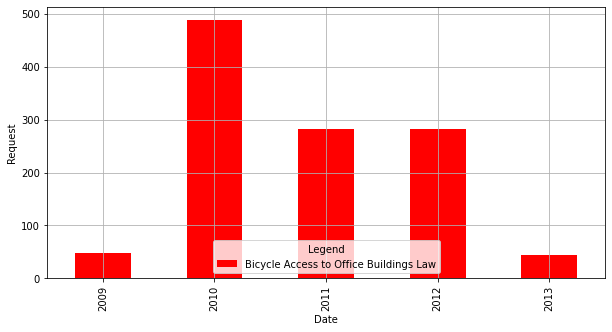

In [23]:
#barplotting the requests as per selected time-frame
%matplotlib inline 
import matplotlib.pyplot as plt
x.plot(kind='bar',figsize=(10,5), color="red")
plt.ylabel('Request')
plt.xlabel('Date')
plt.legend(["Bicycle Access to Office Buildings Law"],loc='lower center',title="Legend",prop={'size': 10})
plt.grid()
plt.show() 

In [27]:
#sorting requests by postcode during the whole time-frame, and eventually reframe
mz = bbr4['TenantPostcode'].value_counts().to_frame()
requestbyzip = {'Zip': [10017, 10022,10019,10036,10020], 'Requests': [196, 138,123,99,40]}
rbz = pd.DataFrame(data=requestbyzip)
rbz.head()

Zip  Requests
0  10017       196
1  10022       138
2  10019       123
3  10036        99
4  10020        40

In [28]:
#zip column converted to str for following map function
rbz1=rbz['Zip'] = rbz['Zip'].astype('str')

In [29]:
#chropletthing the areas involved with major number of requests

m1 = folium.Map(location=[40.7896239, -73.9598939], zoom_start=11)
nycgeozip = '/Users/nic/Desktop/zip_code_040114.geojson'
m1.choropleth(
       geo_data=nycgeozip,
       data=rbz,
       columns=['Zip','Requests'],
       key_on='feature.properties.ZIPCODE',
       fill_color='YlOrRd',
       fill_opacity='0.3',
       line_opacity='0.5',
       legend_name='Top 5 Areas per requests pursuant to Bicycle Access to Office Buildings Law in 2009-2013')

# display the map
m1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
print("SELECTED NEIGHBORHOODS ARE MIDTOWN, TURTLE BAY AND TUDOR CITY")

SELECTED NEIGHBORHOODS ARE MIDTOWN, TURTLE BAY AND TUDOR CITY


**EXPLORE MANHATTAN NEIGHBORHOODS SELECTED UNDER THE EXPLORATORY ANALYSIS ABOVE THROUGH FOURSQUARE**

*Selected Neighborghood*


In [46]:
#Access 4square url - Create Dataset 4
CLIENT_ID = 'JVNUJYZWNDYC1FMQOPN2L51M2CL505MMO15Q2DTDKIJMA2UI' # your Foursquare ID
CLIENT_SECRET = 'Z4OIUYZRUUMQKTRZ5NNCZTVIX5ZTCAQKGOQG1OJHHUUNEEYD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=500
radius=500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


In [47]:
# Write function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-47-7bb482d71ffa>:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


id                        name  \
0  3fd66200f964a520d8f11ee3              City Hall Park   
1  4b475390f964a520f12e26e3          Mary's Coffee Shop   
2  4a676321f964a52051c91fe3          New York City Hall   
3  4b79a5e8f964a52037082fe3                NY Gift Shop   
4  51a4bc7c498e469047be66d6  City Hall Council Chambers   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...  v-1592449676    False   
1  [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...  v-1592449676    False   
2  [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1592449676    False   
3  [{'id': '4bf58dd8d48988d128951735', 'name': 'G...  v-1592449676    False   
4  [{'id': '4bf58dd8d48988d129941735', 'name': 'C...  v-1592449676    False   

     location.address       location.crossStreet  location.lat  location.lng  \
0         17 Park Row  btwn Broadway & Centre St     40.712415    -74.006724   
1  25-15 Queens Plz N                        NaN     40.712786    -74.005944   
2      260 E Broadway               at Murray St     40.712659    -74.005880   
3        234 Canal St              at Centre St.     40.717693    -73.999931   
4           City Hall                        NaN     40.712736    -74.005472   

   location.distance location.postalCode location.cc     location.city  \
0                 69               10038          US          New York   
1                  8               11101          US  Long Island City   
2                 13               10002          US          New York   
3                754               10013          US          New York   
4                 45               10007          US          New York   

  location.state location.country  \
0             NY    United States   
1             NY    United States   
2             NY    United States   
3             NY    United States   
4             NY    United States   

                           location.formattedAddress  \
0  [17 Park Row (btwn Broadway & Centre St), New ...   
1  [25-15 Queens Plz N, Long Island City, NY 1110...   
2  [260 E Broadway (at Murray St), New York, NY 1...   
3  [234 Canal St (at Centre St.), New York, NY 10...   
4     [City Hall, New York, NY 10007, United States]   

                             location.labeledLatLngs venuePage.id  \
0                                                NaN          NaN   
1  [{'label': 'display', 'lat': 40.71278567220636...          NaN   
2                                                NaN    186051114   
3  [{'label': 'display', 'lat': 40.71769332885742...          NaN   
4  [{'label': 'display', 'lat': 40.71273609783686...          NaN   

  location.neighborhood delivery.id delivery.url delivery.provider.name  \
0                   NaN         NaN          NaN                    NaN   
1                   NaN         NaN          NaN                    NaN   
2                   NaN         NaN          NaN                    NaN   
3                   NaN         NaN          NaN                    NaN   
4                   NaN         NaN          NaN                    NaN   

  delivery.provider.icon.prefix delivery.provider.icon.sizes  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  delivery.provider.icon.name  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN

In [48]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]    

dataframe_filtered.head()

name   categories             address  \
0              City Hall Park         Park         17 Park Row   
1          Mary's Coffee Shop  Coffee Shop  25-15 Queens Plz N   
2          New York City Hall    City Hall      260 E Broadway   
3                NY Gift Shop    Gift Shop        234 Canal St   
4  City Hall Council Chambers    City Hall           City Hall   

                 crossStreet        lat        lng  distance postalCode  cc  \
0  btwn Broadway & Centre St  40.712415 -74.006724        69      10038  US   
1                        NaN  40.712786 -74.005944         8      11101  US   
2               at Murray St  40.712659 -74.005880        13      10002  US   
3              at Centre St.  40.717693 -73.999931       754      10013  US   
4                        NaN  40.712736 -74.005472        45      10007  US   

               city state        country  \
0          New York    NY  United States   
1  Long Island City    NY  United States   
2          New York    NY  United States   
3          New York    NY  United States   
4          New York    NY  United States   

                                    formattedAddress  \
0  [17 Park Row (btwn Broadway & Centre St), New ...   
1  [25-15 Queens Plz N, Long Island City, NY 1110...   
2  [260 E Broadway (at Murray St), New York, NY 1...   
3  [234 Canal St (at Centre St.), New York, NY 10...   
4     [City Hall, New York, NY 10007, United States]   

                                      labeledLatLngs neighborhood  \
0                                                NaN          NaN   
1  [{'label': 'display', 'lat': 40.71278567220636...          NaN   
2                                                NaN          NaN   
3  [{'label': 'display', 'lat': 40.71769332885742...          NaN   
4  [{'label': 'display', 'lat': 40.71273609783686...          NaN   

                         id  
0  3fd66200f964a520d8f11ee3  
1  4b475390f964a520f12e26e3  
2  4a676321f964a52051c91fe3  
3  4b79a5e8f964a52037082fe3  
4  51a4bc7c498e469047be66d6

In [49]:
#Explore Function through 4square focused on Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [52]:
manhattan_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

In [53]:
#filter selected neighborhood: Greenwich Village, Flatiron, Midtown, Tudor City and Turtle Bay

mfv = manhattan_venues[manhattan_venues['Neighborhood'].str.contains('Midtown') | manhattan_venues['Neighborhood'].str.contains('Greenwich Village') |  manhattan_venues['Neighborhood'].str.contains('Flatiron') |  manhattan_venues['Neighborhood'].str.contains('Tudor City') |  manhattan_venues['Neighborhood'].str.contains('Turtle Bay')]
mfv.head()


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1063      Midtown              40.754691              -73.981669   
1064      Midtown              40.754691              -73.981669   
1065      Midtown              40.754691              -73.981669   
1066      Midtown              40.754691              -73.981669   
1067      Midtown              40.754691              -73.981669   

                                Venue  Venue Latitude  Venue Longitude  \
1063                      Bryant Park       40.753621       -73.983265   
1064  New York Public Library Terrace       40.753017       -73.981480   
1065            Nat Sherman Townhouse       40.753283       -73.980358   
1066          Joanna Vargas Skin Care       40.753136       -73.980721   
1067                       sweetgreen       40.754640       -73.983102   

     Venue Category  
1063           Park  
1064          Plaza  
1065     Smoke Shop  
1066            Spa  
1067    Salad Place

In [54]:
# one hot encoding
manhattan_onehot = pd.get_dummies(mfv[['Venue Category']], prefix="", prefix_sep="")

# add selected neighborhoods column back to dataframe
manhattan_onehot['Neighborhood'] = mfv['Neighborhood'] 

# move selected neighborhoods column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  American Restaurant  Art Gallery  Arts & Crafts Store  \
1063      Midtown                    0            0                    0   
1064      Midtown                    0            0                    0   
1065      Midtown                    0            0                    0   
1066      Midtown                    0            0                    0   
1067      Midtown                    0            0                    0   

      Asian Restaurant  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
1063                 0          0           0       0     0    0   
1064                 0          0           0       0     0    0   
1065                 0          0           0       0     0    0   
1066                 0          0           0       0     0    0   
1067                 0          0           0       0     0    0   

      Basketball Stadium  Beer Bar  Big Box Store  Bookstore  Boutique  \
1063                   0         0              0          0         0   
1064                   0         0              0          0         0   
1065                   0         0              0          0         0   
1066                   0         0              0          0         0   
1067                   0         0              0          0         0   

      Boxing Gym  Bridal Shop  Bridge  Bubble Tea Shop  Building  \
1063           0            0       0                0         0   
1064           0            0       0                0         0   
1065           0            0       0                0         0   
1066           0            0       0                0         0   
1067           0            0       0                0         0   

      Burger Joint  Café  Camera Store  Caribbean Restaurant  Cheese Shop  \
1063             0     0             0                     0            0   
1064             0     0             0                     0            0   
1065             0     0             0                     0            0   
1066             0     0             0                     0            0   
1067             0     0             0                     0            0   

      Chinese Restaurant  Chocolate Shop  Clothing Store  Cocktail Bar  \
1063                   0               0               0             0   
1064                   0               0               0             0   
1065                   0               0               0             0   
1066                   0               0               0             0   
1067                   0               0               0             0   

      Coffee Shop  Comedy Club  Concert Hall  Convenience Store  \
1063            0            0             0                  0   
1064            0            0             0                  0   
1065            0            0             0                  0   
1066            0            0             0                  0   
1067            0            0             0                  0   

      Cooking School  Cosmetics Shop  Creperie  Cuban Restaurant  \
1063               0               0         0                 0   
1064               0               0         0                 0   
1065               0               0         0                 0   
1066               0               0         0                 0   
1067               0               0         0                 0   

      Cycle Studio  Deli / Bodega  Department Store  Dessert Shop  Diner  \
1063             0              0                 0             0      0   
1064             0              0                 0             0      0   
1065             0              0                 0             0      0   
1066             0              0                 0             0      0   
1067             0              0                 0             0      0   

      Discount Store  Dog Run  Donut Shop  Duty-free Shop  \
1063               0        0           0      

In [55]:
#Grouping and filling in values
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  American Restaurant  Art Gallery  Arts & Crafts Store  \
0           Flatiron             0.010000         0.01                 0.02   
1  Greenwich Village             0.010000         0.01                 0.00   
2            Midtown             0.020000         0.00                 0.00   
3      Midtown South             0.020000         0.00                 0.01   
4         Tudor City             0.013699         0.00                 0.00   

   Asian Restaurant  BBQ Joint  Bagel Shop  Bakery      Bank       Bar  \
0          0.000000       0.00    0.000000    0.02  0.000000  0.000000   
1          0.000000       0.00    0.010000    0.02  0.000000  0.020000   
2          0.000000       0.00    0.000000    0.04  0.000000  0.000000   
3          0.000000       0.01    0.010000    0.01  0.000000  0.010000   
4          0.013699       0.00    0.013699    0.00  0.013699  0.013699   

   Basketball Stadium  Beer Bar  Big Box Store  Bookstore  Boutique  \
0                0.00      0.00           0.00       0.01      0.00   
1                0.00      0.01           0.00       0.00      0.00   
2                0.00      0.00           0.00       0.02      0.01   
3                0.01      0.00           0.01       0.00      0.00   
4                0.00      0.00           0.00       0.00      0.00   

   Boxing Gym  Bridal Shop    Bridge  Bubble Tea Shop  Building  Burger Joint  \
0    0.000000         0.01  0.000000             0.00      0.00      0.010000   
1    0.000000         0.00  0.000000             0.02      0.00      0.010000   
2    0.010000         0.00  0.000000             0.00      0.00      0.000000   
3    0.020000         0.00  0.000000             0.00      0.01      0.030000   
4    0.013699         0.00  0.013699             0.00      0.00      0.013699   

       Café  Camera Store  Caribbean Restaurant  Cheese Shop  \
0  0.050000          0.01                  0.00         0.01   
1  0.050000          0.00                  0.02         0.00   
2  0.010000          0.00                  0.00         0.00   
3  0.040000          0.00                  0.01         0.00   
4  0.068493          0.00                  0.00         0.00   

   Chinese Restaurant  Chocolate Shop  Clothing Store  Cocktail Bar  \
0                0.00            0.01            0.01          0.00   
1                0.03            0.00            0.04          0.01   
2                0.01            0.00            0.04          0.01   
3                0.01            0.00            0.00          0.02   
4                0.00            0.00            0.00          0.00   

   Coffee Shop  Comedy Club  Concert Hall  Convenience Store  Cooking School  \
0     0.040000         0.00          0.00           0.000000            0.01   
1     0.020000         0.01          0.00           0.000000            0.00   
2     0.070000         0.00          0.01           0.000000            0.00   
3     0.020000         0.00          0.00           0.000000            0.00   
4     0.027397         0.00          0.00           0.013699            0.00   

   Cosmetics Shop  Creperie  Cuban Restaurant  Cycle Studio  Deli / Bodega  \
0            0.02      0.00              0.01          0.02       0.000000   
1            0.00      0.01              0.01          0.00       0.000000   
2            0.02      0.00              0.03          0.02       0.010000   
3            0.02      0.00              0.02          0.01       0.000000   
4            0.00      0.00              0.00          0.00       0.027397   

   Department Store  Dessert Shop     Diner  Discount Store   Dog Run  \
0              0.00          0.02  0.000000            0.00  0.000000   
1              0.00          0.02  0.000000            0.00  0.000000   
2              0.00          0.00  0.000000            0.01  0.000000   
3              0.01          0.02  0.000000            0.00  0.000000   
4              0.00          0.00  0.027397    

In [56]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Flatiron----
                      venue  freq
0      Gym / Fitness Center  0.06
1  Mediterranean Restaurant  0.05
2                      Café  0.05
3   New American Restaurant  0.04
4               Coffee Shop  0.04
5                       Spa  0.03
6       Japanese Restaurant  0.03
7        Italian Restaurant  0.03
8                      Park  0.03
9                       Gym  0.03


----Greenwich Village----
                  venue  freq
0    Italian Restaurant  0.09
1      Sushi Restaurant  0.05
2                  Café  0.05
3        Clothing Store  0.04
4        Ice Cream Shop  0.03
5    Chinese Restaurant  0.03
6     French Restaurant  0.03
7                   Gym  0.02
8        Sandwich Place  0.02
9  Caribbean Restaurant  0.02


----Midtown----
                 venue  freq
0                Hotel  0.07
1          Coffee Shop  0.07
2       Clothing Store  0.04
3               Bakery  0.04
4              Theater  0.04
5     Cuban Restaurant  0.03
6          Pizza Place  0.03
7

In [57]:
#We can finally identify the most common venues in the selected Neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Flatiron  Gym / Fitness Center                  Café   
1  Greenwich Village    Italian Restaurant                  Café   
2            Midtown                 Hotel           Coffee Shop   
3      Midtown South     Korean Restaurant                 Hotel   
4         Tudor City                  Café                  Park   

      3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0  Mediterranean Restaurant  New American Restaurant           Coffee Shop   
1          Sushi Restaurant           Clothing Store        Ice Cream Shop   
2            Clothing Store                   Bakery               Theater   
3       Japanese Restaurant                     Café                Lounge   
4        Mexican Restaurant         Sushi Restaurant                   Gym   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant                   Gym                  Park   
1    Chinese Restaurant     French Restaurant                   Bar   
2      Cuban Restaurant           Pizza Place            Steakhouse   
3          Burger Joint   American Restaurant          Cocktail Bar   
4                Garden               Dog Run                 Diner   

           9th Most Common Venue 10th Most Common Venue  
0  Vegetarian / Vegan Restaurant    Japanese Restaurant  
1                 Pilates Studio        Bubble Tea Shop  
2              Indian Restaurant            Tailor Shop  
3                            Spa              Hotel Bar  
4                Thai Restaurant          Deli / Bodega

**Time Series Prediction with LSTM Recurrent Neural Networks to predict 24h subscribe for access to electric scooter Beta Project**

In [29]:
##Import LIbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings 
warnings.filterwarnings('ignore')

In [57]:
path='/Users/nic/Desktop/cbmembership.csv'
cbmm = pd.read_csv(path,
                   parse_dates=['Date'],
                   index_col=['Date'])
cbmm = cbmm.astype('float32')
cbmm.tail()

singlepass
Date                  
2015-02-28      5052.0
2015-03-31     27177.0
2015-04-30     57600.0
2015-05-31     40615.0
2015-06-30     40593.0

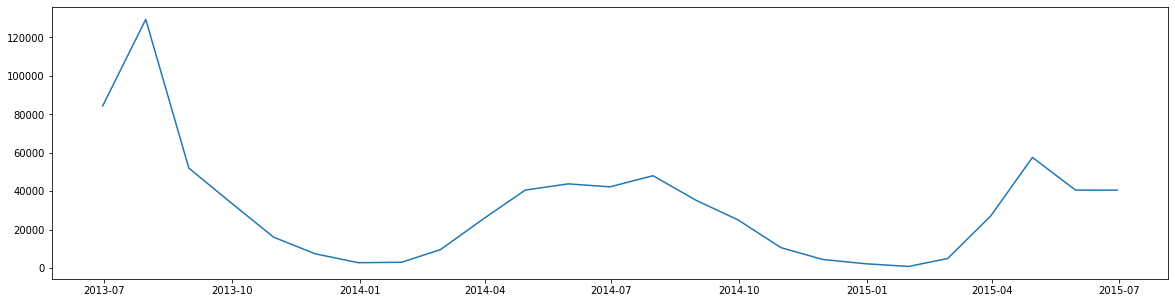

In [31]:
plt.figure(figsize=(20,5))
plt.plot(cbmm)
plt.show()

In [32]:
train, test =cbmm[:-12], cbmm[-12:]

In [33]:
#scaling
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(test)
train = scaler.transform(train)
test = scaler.transform(test)

In [45]:
n_input = 12
n_features = 1
generator= TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model= Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator, epochs=180)

Epoch 1/180
3/3 [==============================] - 1s 177ms/step - loss: 0.0657
Epoch 2/180
3/3 [==============================] - 0s 23ms/step - loss: 0.0480
Epoch 3/180
3/3 [==============================] - 0s 18ms/step - loss: 0.0298
Epoch 4/180
3/3 [==============================] - 0s 22ms/step - loss: 0.0213
Epoch 5/180
3/3 [==============================] - 0s 21ms/step - loss: 0.0245
Epoch 6/180
3/3 [==============================] - 0s 19ms/step - loss: 0.0225
Epoch 7/180
3/3 [==============================] - 0s 19ms/step - loss: 0.0186
Epoch 8/180
3/3 [==============================] - 0s 19ms/step - loss: 0.0181
Epoch 9/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0180
Epoch 10/180
3/3 [==============================] - 0s 20ms/step - loss: 0.0197
Epoch 11/180
3/3 [==============================] - 0s 16ms/step - loss: 0.0187
Epoch 12/180
3/3 [==============================] - 0s 16ms/step - loss: 0.0176
Epoch 13/180
3/3 [==============================

In [19]:
pred_list=[]
batch=train[-n_input:].reshape((1,n_input, n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:], [[pred_list[i]]], axis=1)

In [20]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=cbmm[-n_input:].index, columns=['predictions'])
df_test=pd.concat([cbmm,df_predict], axis=1)

In [21]:
df_test.tail(7)

singlepass   predictions
12/31/2014      2325.0  31341.490054
1/31/2015        929.0  32820.791228
2/31/2015       5052.0  34380.630598
3/31/2015      27177.0  35821.380314
4/31/2015      57600.0  36516.384103
5/31/2015      40615.0  36287.308114
6/31/2015      40593.0  35789.408916

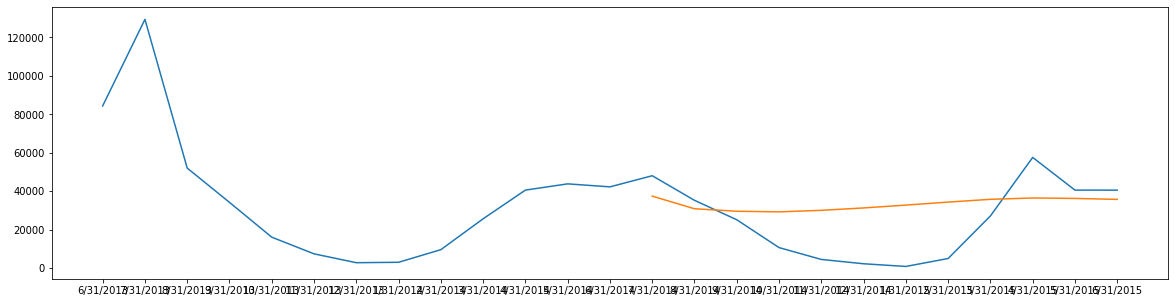

In [22]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['singlepass'])
plt.plot(df_test.index, df_test['predictions'])

In [50]:
train=cbmm
scaler.fit(train)
train = scaler.transform(train)
n_input = 12
n_features = 1
generator= TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model.fit_generator(generator, epochs=180)
pred_list=[]
batch= train [-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:], [[pred_list[i]]], axis=1)

Epoch 1/180
3/3 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 2/180
3/3 [==============================] - 0s 19ms/step - loss: 8.2757e-04
Epoch 3/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 4/180
3/3 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 5/180
3/3 [==============================] - 0s 17ms/step - loss: 4.8264e-04
Epoch 6/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0012
Epoch 7/180
3/3 [==============================] - 0s 16ms/step - loss: 9.8801e-04
Epoch 8/180
3/3 [==============================] - 0s 19ms/step - loss: 9.5782e-04
Epoch 9/180
3/3 [==============================] - 0s 17ms/step - loss: 5.3414e-04
Epoch 10/180
3/3 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 11/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0011
Epoch 12/180
3/3 [==============================] - 0s 17ms/step - loss: 8.5913e-04
Epoch 13/180
3/3 [=======

In [51]:
from pandas.tseries.offsets import DateOffset
add_dates = [cbmm.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=cbmm.columns)
future_dates.head()

singlepass
2015-07-30        NaN
2015-08-30        NaN
2015-09-30        NaN
2015-10-30        NaN
2015-11-30        NaN

In [52]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['predictions'])
df_proj=pd.concat([cbmm,df_predict], axis=1)
df_proj.tail(10)

singlepass   predictions
2015-09-30         NaN  20974.692779
2015-10-30         NaN  10383.555670
2015-11-30         NaN   5529.227994
2015-12-30         NaN   3481.583744
2016-01-30         NaN   3157.972632
2016-02-29         NaN   4973.904558
2016-03-30         NaN  43162.804735
2016-04-30         NaN  50501.237525
2016-05-30         NaN  42421.964547
2016-06-30         NaN  37211.160163

No handles with labels found to put in legend.


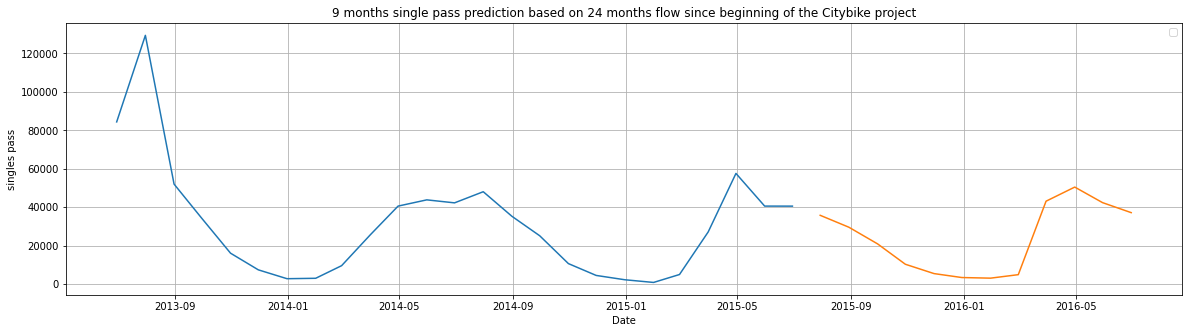

In [58]:
plt.figure(figsize=(20,5))
plt.plot(df_proj.index, df_proj['singlepass'])
plt.plot(df_proj.index, df_proj['predictions'])
plt.xlabel('Date')
plt.ylabel('singles pass')
plt.title('9 months single pass prediction based on 24 months flow since beginning of the Citybike project')
plt.legend()
plt.grid()

## 5. RESULTS

**(A)	Most used start and end Citybike stations in Manhattan during June 2013**

We have identified the most used start and end Citybike stations during the month of June 2013 when the Citybike project was initially launched. 

The two most used start stations were: (1) W 20 St & 11 Ave with 5983 counted starting trips; and (2) E 17 St & Broadway with 5621 counted starting trips.

The two most used end stations were: (1) W 20 St & 11 Ave with 5742 counted starting trips [Neighborhood: Greenwich Village]; and (2) E 17 St & Broadway with 5530 counted starting trips [Neighborhood: Flatiron].

**(B)	neighborhoods where commercial buildings that received major number of requests as per BAOB law**

We have identified neighborhoods where commercial buildings that received major number of requests from tenant to park bikes inside under the BAOB law are located. The result below shows that Turtle Bay, Tudor City, Midtown and Midtown South (partially) is the area mostly involved by commercial buildings requests to park their bicycles inside.

**(C)	Are restaurants, gyms and coffee shops the most common venues (under a top 5 most common venues scale) in neighborhoods identified under (A) and (B) above?**

The answer is Yes for two selected neighborhoods. The Foursquare Data below shows that Flatiron and Tudor City are the closest with respect to the third criteria identified by the Company for the selection of the neighborhoods where to install the two pick-up stations. Gyms, Coffee Shops and Restaurants are indeed the most common venues in such areas.


**(D)	The LSTM prediction model shows a potential constant regression of the single accesses to the electric scooters. The result is however partial and not complete for reasons explain under Section 3 par. 6 above.**

## 6. DISCUSSION

We have been asked to identify pick-up stations for electric scooters based on the following criteria: (1) neighborhoods where most used Citybike stations in Manhattan in the month of June 2013 (when the Citybike project was launched) were located; (2) neighborhoods where commercial buildings are inclined to have inside bikes parking; and (3) the presence of restaurant, gym and coffee shop as most common venues in neighborhoods identified under (1) and (2). 

We noted that under (1) the pick-up stations should be located in Greenwich Village and Flatiron which the most used Citybike stations were located in the month of June 2013 when Citybike project initially started. 

We noted that under (2) we could use the Dataset 3 which include the list of commercial buildings which received tenants’ request to park inside the buildings under the BAOB law of NYC. We then identified that the neighborhoods in which commercial buildings that received most of such requests were located in Midtown, Midtown South, Tudor City, and Turtle Bay. We also noted that after the enactment of the BAOB law, during a time-frame of 5 years, such buildings received most requests during the second year after the enactment of the law (2010). If a law similar to the BAOB law would be enacted by NYC for electric scooters, this information should be evaluated by the Company in two main perspectives: (i) installation of further stations in the areas identified under (2) to the extent that the company should expect an issuance of tenants request for parking electric scooters inside the building; and (ii) potential electric scooters private lease agreements with the commercial buildings of such areas.

We finally noted under (3) that Tudor City and Flatiron are the neighborhoods where gyms, restaurant and coffee shops are collectively included in the top 5 common venues.

## 7. DISCUSSION

In conclusion, Tudor City and Flatiron are most suitable areas for stations installation according to the criteria given by the company to prepare our data exploratory analysis.


## 8. STEPS FORWARD

A.	Accuracy of the models shown above has room for improvement in terms of identification of more specific areas in the maps and/or identification of neighborhood borders. 

B.	Mapping Manhattan bike lanes routes and merged this map with each map shown above with transparency mode to give further insights on the most convenient locations for pick-up stations.

C.	Analyze MTA data for commuting density data from Upper East Side and Upper West Side (identified as typical residential areas) and compare with eventual Citybike trips in these areas to show potential installation of stations in these areas.

D.	Business-plan preparation: identify price range for different types of membership in comparison to Citybike most recent applied prices.

E. Applied different regression models to predict future single passes subscriptions based on Citybike available data or similar scooter sharing models
